In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/farhansayyed165/Highway-Data/main/Data/Vehicles/Basic_CLassify.csv', index_col='Unnamed: 0')
y = df.filter(like="vehicle", axis=1)
X = df.drop('vehicle', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
d = pd.read_csv('https://raw.githubusercontent.com/farhansayyed165/Highway-Data/main/Data/Vehicles/Base_data.csv')

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.sha

,states,accidents,killed,injured,year
0,1,9409.0,2343.0,7712.0,2017.0
1,2,62.0,32.0,67.0,2017.0
2,3,2125.0,772.0,1567.0,2017.0
3,4,2035.0,1318.0,1219.0,2017.0
4,5,4696.0,1386.0,4012.0,2017.0
...,...,...,...,...,...
1075,32,5.0,3.0,3.0,2020.0
1076,33,0.0,0.0,0.0,2020.0
1077,34,259.0,120.0,234.0,2020.0
1078,35,0.0,0.0,0.0,2020.0


In [23]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
cf = GaussianNB()
cf.fit(X_train_scaled, y_train.values.ravel())

GaussianNB()

In [25]:
y_pred = cf.predict(X_test_scaled)

In [26]:
accuracy_score(y_test, y_pred)

0.25077399380804954

In [27]:
cm = confusion_matrix(y_test, y_pred)

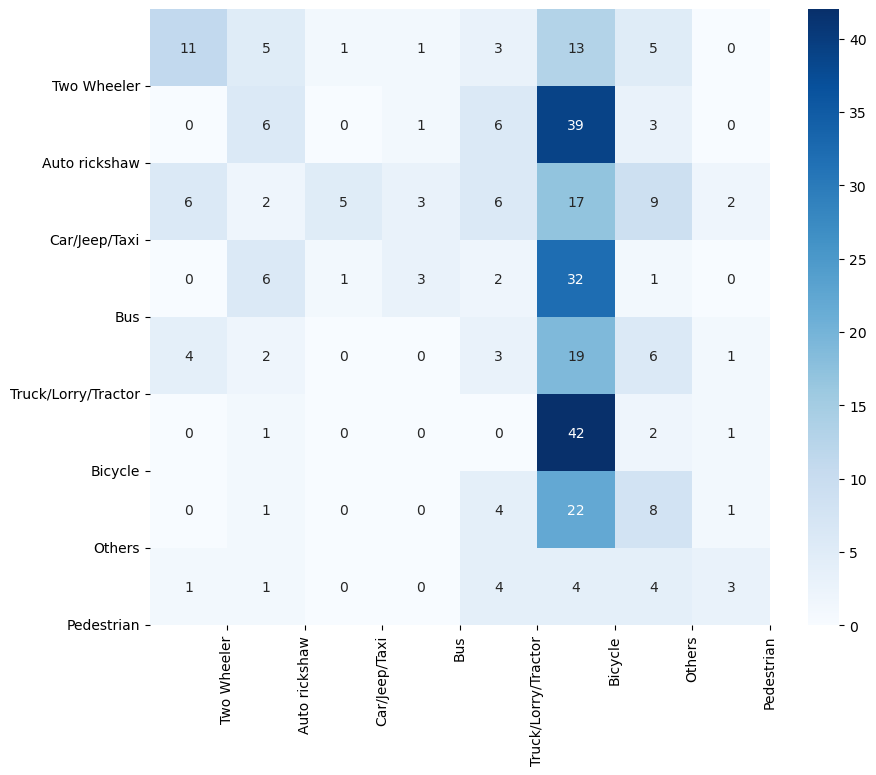

In [29]:
labels=d['Impacting Vehicle Type'].unique()
x=[1,2,3,4,5,6,7,8]
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xticks(x, labels, rotation = 90)
plt.yticks(x, labels, rotation = 0)
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.28      0.36        39
           2       0.25      0.11      0.15        55
           3       0.71      0.10      0.18        50
           4       0.38      0.07      0.11        45
           5       0.11      0.09      0.10        35
           6       0.22      0.91      0.36        46
           7       0.21      0.22      0.22        36
           8       0.38      0.18      0.24        17

    accuracy                           0.25       323
   macro avg       0.34      0.24      0.21       323
weighted avg       0.35      0.25      0.21       323

